<a href="https://colab.research.google.com/github/MoonNbyen/sharing_is_caring/blob/main/HateSpeechAgainstBlack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evolution of Hate Speech on Twitter since Elon Musk ’s Acquisition 
##Focus on hate speech towards the Black community


## Analysis of niggers and nigger between 23.10.2022 to 30.10.2022

In [10]:
## install the libraries
!pip install twarc
!pip install twitterexplorer
!pip install minet
!pip install -U textblob
!pip install WordCloud
!pip install pyopenssl ndg-httpsclient pyasn1
!pip install tweepy
#!pip install gensim
!git clone https://github.com/rubingshen/AugmentedSocialScientist.git
!pip install ./AugmentedSocialScientist/package/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached charset_normalizer-3.1.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (199 kB)
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 2.0.12
    Uninstalling charset-normalizer-2.0.12:
      Successfully uninstalled charset-normalizer-2.0.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.27.1 requires charset-normalizer~=2.0.0; python_version >= "3", but you have charset-normalizer 3.1.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels

In [11]:
!pip install bertopic
!pip install twitterexplorer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# imports the cuda module from the torch library and retrieves the name of the GPU device 
from torch import cuda
cuda.get_device_name(0)


'Tesla T4'

In [14]:
#import necessary packages
from twitterexplorer.tweetcollector import Collector
from twitterexplorer.helpers import load_data
from twitterexplorer.plotting import tweetdf_to_timeseries
from twitterexplorer.plotting import plot_timeseries

In [15]:
# import necessary packages
import re
import seaborn as sns
import sys
import json
import os
import time
import pandas as pd
import numpy as np
import datetime as dt
import numpy as np

import twarc
import tweepy

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from textblob import TextBlob
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime
%matplotlib inline 
#from AugmentedSocialScientist import bert _install later

In [16]:
# Accessing Twitter API with key, token, token secrete to count the tweet

consumer_key = "h4TrdrV99ZN0EPnDhJLm3F3lT"
consumer_secret = "ctcOpJhNRT3t0ml1HdbbUyEScN4nB6pAz98dDmJZyCgUgBLL50"
access_token = "1618618578437013508-tLlnrkPTrfRDIGWnGzRvPjM2QozmqM"
access_token_secret ="mGsnKWIgMvYEKHfzjCN19BEDZc5k2qv5e9FHYdAAGV90p"

# create an OAuthHandler instance
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# set the access token and access token secret
auth.set_access_token(access_token, access_token_secret)

# create a Tweepy API instance
api = tweepy.API(auth)

# test authentication
try:
    api.verify_credentials()
    print("Authentication successful")
except tweepy.TweepError as e:
    print("Error during authentication:", e)

Authentication successful


In [17]:
# Putting Bearer token into variable
client = twarc.Twarc2(bearer_token="AAAAAAAAAAAAAAAAAAAAADtNlwEAAAAAu5olLuajmMDJJCDIiAFYnWeaD6g%3DT4mH9OI2QJh0kzFav0zEWsVjYjzwsJEivgqvWMoravUbRtExMJ")

## Counting Tweet nigger OR nigger and compare the result with other N-words

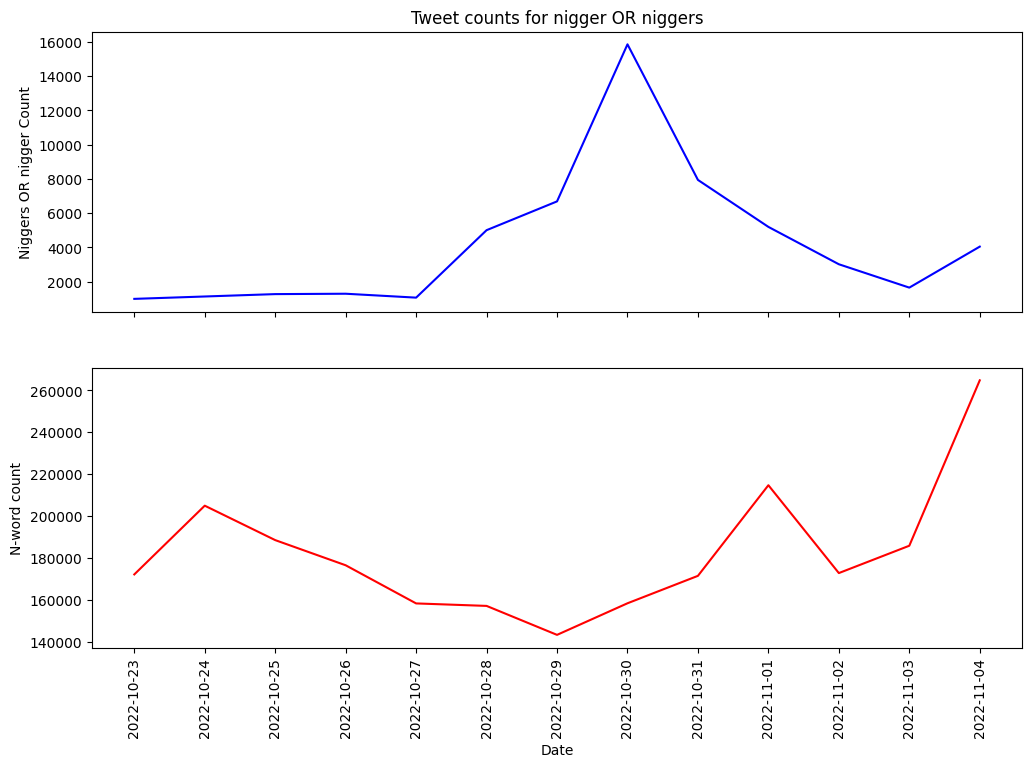

In [18]:
# Set up the query and time range
search_query_n = "niggers OR nigger"
since_date = datetime.datetime.strptime("2022-10-23", '%Y-%m-%d')
until_date = datetime.datetime.strptime("2022-11-05", '%Y-%m-%d')
search_query = "nigger OR niggers OR niggar OR niggur OR niger OR nigor OR nigre OR nigar OR nigga OR niggah OR nigguh OR niglet OR nigglet OR nigra OR negra OR niggra OR nigrah OR nigruh"


# Call the API to get the tweet count data for each query
results_n = client.counts_all(query=search_query_n, start_time=since_date, end_time=until_date, granularity="day")
results = client.counts_all(query=search_query, start_time=since_date, end_time=until_date, granularity="day")

# Extract the dates and tweet counts from the data for each query
n_dates = []
n_counts = []
for page in results_n:
    data = page['data']
    dates = [d['start'][:10] for d in data]
    counts = [d['tweet_count'] for d in data]
    n_dates.extend(dates)
    n_counts.extend(counts)
n_dates = sorted([datetime.datetime.strptime(d, '%Y-%m-%d') for d in n_dates])
n_dates = [datetime.datetime.strftime(d, '%Y-%m-%d') for d in n_dates]

all_dates = []
all_counts = []
for page in results:
    data = page['data']
    dates = [d['start'][:10] for d in data]
    counts = [d['tweet_count'] for d in data]
    all_dates.extend(dates)
    all_counts.extend(counts)
all_dates = sorted([datetime.datetime.strptime(d, '%Y-%m-%d') for d in all_dates])
all_dates = [datetime.datetime.strftime(d, '%Y-%m-%d') for d in all_dates]

# Create the subplot and plot each graph in its corresponding subplot
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axs[0].plot(n_dates, n_counts, color='blue')
axs[0].set_ylabel("Niggers OR nigger Count")
axs[0].set_title("Tweet counts for nigger OR niggers")

axs[1].plot(all_dates, all_counts, color='red')
axs[1].set_ylabel("N-word count")
axs[1].set_xlabel("Date")

plt.xticks(rotation=90)
plt.show()


## Exploring Collected Data from Twitter Explorer 
##Dated between 23.10.2022 to 30.10.2022 Keywords = nigger OR niggers

In [19]:
# Read scraping data from twitter. Scraped data from 23.10.2022 to 30.10.2022 Keyword= niggers OR nigger
tweet_df = pd.read_csv('https://raw.githubusercontent.com/MoonNbyen/sharing_is_caring/main/NNTweets.csv')

In [20]:
# To check what are inside of data.
print(tweet_df.columns,tweet_df.shape)
print(tweet_df.isnull().sum())
print(tweet_df.describe)

Index(['id', 'timestamp_utc', 'local_time', 'user_screen_name', 'text',
       'possibly_sensitive', 'retweet_count', 'like_count', 'reply_count',
       'impression_count', 'lang', 'to_username', 'to_userid', 'to_tweetid',
       'source_name', 'source_url', 'user_location', 'lat', 'lng', 'user_id',
       'user_name', 'user_verified', 'user_description', 'user_url',
       'user_image', 'user_tweets', 'user_followers', 'user_friends',
       'user_likes', 'user_lists', 'user_created_at', 'user_timestamp_utc',
       'collected_via', 'match_query', 'retweeted_id', 'retweeted_user',
       'retweeted_user_id', 'retweeted_timestamp_utc', 'quoted_id',
       'quoted_user', 'quoted_user_id', 'quoted_timestamp_utc',
       'collection_time', 'url', 'place_country_code', 'place_name',
       'place_type', 'place_coordinates', 'links', 'domains', 'media_urls',
       'media_files', 'media_types', 'media_alt_texts', 'mentioned_names',
       'mentioned_ids', 'hashtags'],
      dtype='object')

## Pre-Processing 

In [21]:
def text_preprocessor(text):
    return " ".join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?#", " ", text.lower()).split())



In [22]:
tweet_df['processed_text'] = tweet_df['text'].apply(lambda x: text_preprocessor(x))

In [23]:
tweet_df['processed_text']

0        is true you can say nigger now asking for a fr...
1        calling me a gorilla and a nigger for simply h...
2        calling me a gorilla and a nigger for simply h...
3                                        prodzz sup nigger
4        calling me a gorilla and a nigger for simply h...
                               ...                        
35296                          he had to call him a nigger
35297                                           one nigger
35298    porn titles be so disrespectful when it come t...
35299    romano if you ever think about me or if you th...
35300    i m sorry but you can t just be casually a whi...
Name: processed_text, Length: 35301, dtype: object

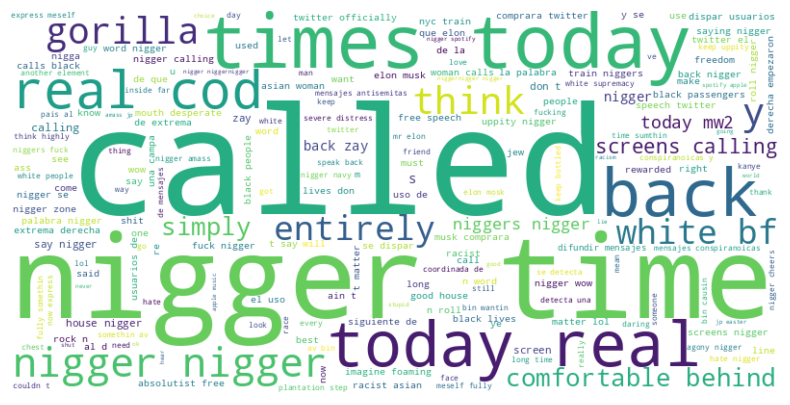

In [24]:
# import required libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# combine all preprocessed texts into a single string
text = " ".join(tweet_df['processed_text'])

# create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(text)

# display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## Sentimental Analysis to oversee the tweet before distinguish between hate and non hate speech

In [25]:
tweet_df["sentiment"] = tweet_df["processed_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

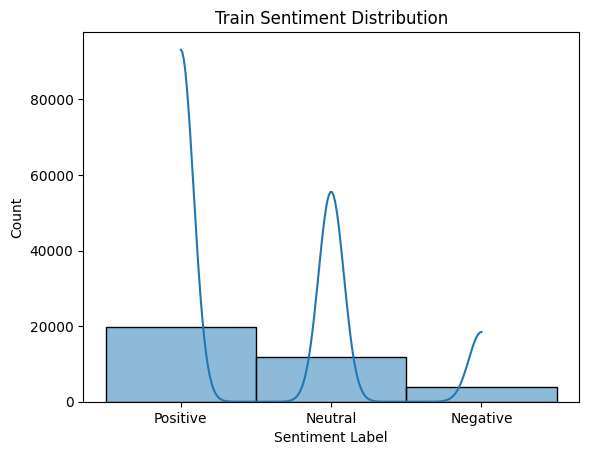

In [26]:
# Function to map sentiment polarity to sentiment label
def get_sentiment_label(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"

# Create sentiment label column for train data
tweet_df["sentiment_label"] = tweet_df["sentiment"].apply(get_sentiment_label)

# Sentiment distribution for train data
sns.histplot(data=tweet_df, x="sentiment_label", kde=True, bins=20)
plt.title("Train Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()


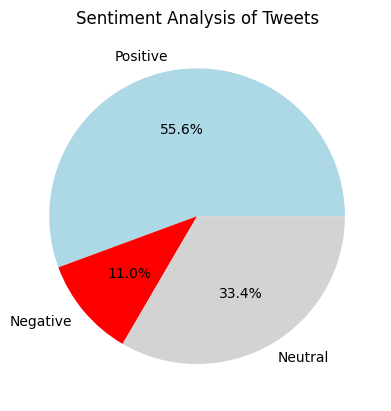

In [27]:
# Create counters for positive, negative, and neutral tweets
pos_count = 0
neg_count = 0
neu_count = 0

# Analyze the sentiment of each tweet using TextBlob
for tweet in tweet_df['text']:
    sentiment = TextBlob(tweet).sentiment.polarity
    if sentiment > 0:
        pos_count += 1
    elif sentiment < 0:
        neg_count += 1
    else:
        neu_count += 1

# Create a pie chart of the sentiment distribution
labels = ['Positive', 'Negative', 'Neutral']
sizes = [pos_count, neg_count, neu_count]
colors = ['lightblue', 'red', 'lightgrey']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Sentiment Analysis of Tweets')
plt.show()


## Training the model with BERT model

In [28]:
#Import annotated data to trian the model
# hatespeechD is combination of two files. One file is annotated manually by our team and one file is dataset from Kaggle. Please see more on ReadMe
hate= pd.read_excel('https://raw.githubusercontent.com/MoonNbyen/sharing_is_caring/main/hatespeechD.xlsx')


In [29]:
hate.dropna

<bound method DataFrame.dropna of        label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
32433      0  Baby you can get called a nigger anywhere in t...
32434      0  Folks talking hell of shit about Alabama. Like...
32435      1                        NIGGER NIGGER NIGGER NIGGER
32436      1                 @LucidLeafyy @freakytf stfu nigger
32437      1  . Virgo (tuarus / cáncer) got temper (?) block...

[32438 rows x 2 columns]>

In [30]:
hate

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
32433,0,Baby you can get called a nigger anywhere in t...
32434,0,Folks talking hell of shit about Alabama. Like...
32435,1,NIGGER NIGGER NIGGER NIGGER
32436,1,@LucidLeafyy @freakytf stfu nigger


In [31]:

hate['label'] = hate['label'].map(lambda x: int(x) if str(x).isdigit() else None)
hate = hate.dropna(subset=['label'])
hate = hate.dropna()  # drop rows containing NaN values
hate = hate.dropna(axis=1) 

In [32]:
counts = hate['label'].value_counts()
print(counts)


0    29872
1     2565
Name: label, dtype: int64


In [33]:
# shuffle rows 
hate=hate.sample(frac=1)

#let's separate the data in two sets: training (80%) and testing data (20%)
hate['set']=['training']*int(len(hate)*.8) + ['testing']*(len(hate)-int(len(hate)*.8))


In [34]:
hate_df_training=hate[hate['set']=='training']
hate_df_testing=hate[hate['set']=='testing']

In [35]:
hate_df_training

,label,tweet,set
1830,0,@user is the prosecutor considering criminal ...,training
7933,0,@user @user @user only companies who allow peo...,training
12984,0,#happiness is do what you #love and do it ofte...,training
29465,0,#babies evenflo lux24 travel system with lit...,training
24507,0,"@user living, loving , laughing @user #friend...",training
...,...,...,...
28750,0,@user @user #bihday to the hit machine. a ma...,training
24634,0,#euro2016 eng vs rus wud be not be remembered ...,training
1527,0,i am thankful for honest conversations. #thank...,training
14935,0,looks like sir bob geldof has joined the rich ...,training


In [36]:
print(type(hate_df_training['label']))

<class 'pandas.core.series.Series'>


In [37]:
# import BERT from AugmentedSocialScientist

from AugmentedSocialScientist import bert# note that we could use a language model trained on tweets like Berttweet 

There are 1 GPU(s) available.
We will use GPU 0: Tesla T4


In [38]:

train_loader = bert.encode(hate_df_training.tweet.values, hate_df_training.label.values)

  0%|          | 0/25949 [00:00<?, ?it/s]

  0%|          | 0/25949 [00:00<?, ?it/s]

In [39]:
train_loader

In [40]:
test_loader = bert.encode(hate_df_testing.tweet.values, hate_df_testing.label.values)

  0%|          | 0/6488 [00:00<?, ?it/s]

  0%|          | 0/6488 [00:00<?, ?it/s]

In [41]:
test_loader

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import os


# set the path where you want to save the model
model_dir = '/content/drive/MyDrive/hate_speech_detector'

# create the directory if it does not exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# save the model in the specified directory
model_path = os.path.join(model_dir, 'hate_speech_detector.pt')

score = bert.run_training(train_loader, 
                          test_loader, 
                          n_epochs=4, 
                          lr=5e-5, 
                          seed_val=42,
                          save_model_as=model_path)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    811.    Elapsed: 0:00:38.
  Batch    80  of    811.    Elapsed: 0:01:16.
  Batch   120  of    811.    Elapsed: 0:01:56.
  Batch   160  of    811.    Elapsed: 0:02:36.
  Batch   200  of    811.    Elapsed: 0:03:16.
  Batch   240  of    811.    Elapsed: 0:03:56.
  Batch   280  of    811.    Elapsed: 0:04:36.
  Batch   320  of    811.    Elapsed: 0:05:16.
  Batch   360  of    811.    Elapsed: 0:05:57.
  Batch   400  of    811.    Elapsed: 0:06:37.
  Batch   440  of    811.    Elapsed: 0:07:17.
  Batch   480  of    811.    Elapsed: 0:07:57.
  Batch   520  of    811.    Elapsed: 0:08:37.
  Batch   560  of    811.    Elapsed: 0:09:17.
  Batch   600  of    811.    Elapsed: 0:09:57.
  Batch   640  of    811.    Elapsed: 0:10:37.
  Batch   680  of    811.    Elapsed: 0:11:17.
  Batch   720  of    811.    Elapsed: 0:11:57.
  Batch   760  of    811.    Elapsed: 0:12:38.
  Batch   800  of    811.    Elapsed: 0:13:18.

  Average traini

## Predict the collected tweet with trained BERT model

In [44]:
# Read scraping data from twitter. Scraped data from 23.10.2022 to 30.10.2022 Keyword= niggers OR nigger
cb_pred = pd.read_csv('https://raw.githubusercontent.com/MoonNbyen/sharing_is_caring/main/NNTweets.csv')

In [45]:
cb_pred

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,impression_count,...,place_coordinates,links,domains,media_urls,media_files,media_types,media_alt_texts,mentioned_names,mentioned_ids,hashtags
0,1587232949677821955,1667260799,2022-10-31T23:59:59,kjcoqui,Is true you can say Nigger now?\nAsking for a ...,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1587232824649719810,1667260769,2022-10-31T23:59:29,KlLLERKLOWNS,RT @lovedoveclarke: calling me a gorilla and a...,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lovedoveclarke,1068014810804174848,NaN
2,1586876904673419264,1667175911,2022-10-31T00:25:11,lovedoveclarke,calling me a gorilla and a nigger for simply h...,1,7624,159861,1129,0,...,NaN,https://twitter.com/lovedoveclarke/status/1586...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1587232770287337472,1667260756,2022-10-31T23:59:16,GuardUpClan,@Embiid_prodzz sup nigger,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Embiid_prodzz,1456696144017383426,NaN
4,1587232718709989376,1667260744,2022-10-31T23:59:04,abby82s,RT @lovedoveclarke: calling me a gorilla and a...,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lovedoveclarke,1068014810804174848,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35296,1584334718295629824,1666569807,2022-10-24T00:03:27,ski672,@bigfightplug He had to call him a nigger 😂 👊🏾,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bigfightplug,1552076792869126144,NaN
35297,1584334652588068865,1666569791,2022-10-24T00:03:11,AnferneeVilleg4,@alisono_one nigger,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35298,1584334561353535488,1666569769,2022-10-24T00:02:49,froggqii,porn titles be so disrespectful when it come t...,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35299,1584334285678387201,1666569703,2022-10-24T00:01:43,genzcommunist,@liv_romano “If you ever think about me or if ...,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
pred_loader = bert.encode(cb_pred.text.values)

  0%|          | 0/35301 [00:00<?, ?it/s]

  0%|          | 0/35301 [00:00<?, ?it/s]

In [ ]:
pred_proba = bert.predict_with_model(pred_loader, model_path='/content/models/content/drive/MyDrive/hate_speech_detector/hate_speech_detector.pt')

  0%|          | 0/1104 [00:00<?, ?it/s]

In [ ]:
cb_pred['pred_label'] = np.argmax(pred_proba, axis=1)
cb_pred['pred_proba'] = np.max(pred_proba, axis=1)

In [ ]:
for i in range(len(cb_pred)):
    print(f"{cb_pred.loc[i,'text']}")
    print(f"Is hateful: {bool(cb_pred.loc[i,'pred_label'])}, with a probability of {cb_pred.loc[i,'pred_proba']*100:.0f}%")
    print()

In [ ]:
import pandas as pd
from datetime import datetime

# create a new dataframe
result_df = pd.DataFrame(columns=['Local Time', 'Text', 'Is hateful', 'Probability'])

# fill the dataframe with data
for i in range(len(cb_pred)):
    local_time = cb_pred.loc[i,'local_time']
    text = cb_pred.loc[i,'text']
    is_hateful = bool(cb_pred.loc[i,'pred_label'])
    probability = cb_pred.loc[i,'pred_proba']*100
    
    result_df.loc[i] = [local_time, text, is_hateful, probability]

# save the dataframe as an Excel file
result_df.to_excel('result.xlsx', index=False)



## Topic Modelling with BERT Topic

In [ ]:
!pip install tensorflow_probability==0.12.2

In [ ]:
cb = pd.read_csv('https://raw.githubusercontent.com/MoonNbyen/sharing_is_caring/main/NNTweets.csv')

In [ ]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [ ]:
cb = cb[cb['text'].notna()]
documents = list(cb['text'])

In [ ]:
## first, embed the documents
model = SentenceTransformer("all-MiniLM-L6-v2")
document_vectors = model.encode(documents,show_progress_bar=True)

In [ ]:
# Define sub-models
vectorizer = CountVectorizer(stop_words=stopwords)
umap_model = UMAP(n_neighbors=10, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=20, min_samples=2, metric='euclidean', cluster_selection_method='eom')

# Train our topic model with BERTopic
topic_model = BERTopic(
    embedding_model=model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer,
    verbose=True
).fit(documents, document_vectors)

In [ ]:
topic_model.visualize_barchart(top_n_topics=100)

## Counting hate and non hate between 23.10.2022 to 30.10.2022

In [ ]:
df1 = pd.read_excel('result.xlsx')


In [ ]:
df1.columns

In [ ]:
df1['Local Time'] = pd.to_datetime(df1['Local Time'])

# Extract the date from the Local Time column
df1['Date'] = df1['Local Time'].dt.date

In [ ]:
df1['Date']

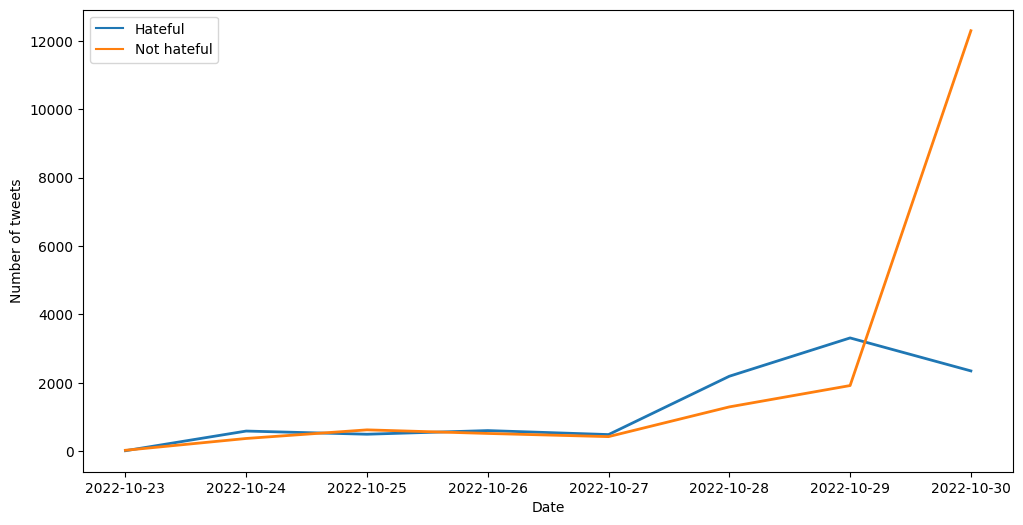

In [78]:
# Select only the rows that fall between 23/10/2022 and 01/11/2022
start_date = pd.to_datetime('2022-10-23').date()
end_date = pd.to_datetime('2022-10-30').date()
mask = (df1['Date'] >= start_date) & (df1['Date'] <= end_date)
df1 = df1.loc[mask]

# Create a pivot table with Date as the index and separate columns for True and False
pivot_df = pd.pivot_table(df1, values='Text', index='Date', columns='Is hateful', aggfunc='count')

# Create the line plot with separate lines for True and False
fig, ax = plt.subplots(figsize=(12, 6)) # Set figure size
ax.plot(pivot_df.index, pivot_df[True], label='Hateful')
ax.plot(pivot_df.index, pivot_df[False], label='Not hateful')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Number of tweets')

# Set the legend
ax.legend()

# Set the line width
plt.setp(ax.get_lines(), linewidth=2)

# Show the plot
plt.show()


#Testing with Support Vector Classification and Naive Bayes Classificaiton model**

In [ ]:
# imporing annotated data to train the model
hate = pd.read_excel('https://raw.githubusercontent.com/MoonNbyen/sharing_is_caring/main/hatespeechD.xlsx')
hate.to_csv('hatespeechD.csv', index=False)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np



# Remove rows with missing values
hate = hate.dropna(subset=['tweet'])

# Split the data into training and testing sets
tweet_train, tweet_test, label_train, label_test = train_test_split(hate['tweet'], hate['label'], test_size=0.2, random_state=42)

# Define the pipeline including CounterVectorizer, TFidf and Naive Bayes
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Fit the pipeline to the training data
pipeline.fit(tweet_train, label_train)

# Make predictions on the test data
predictions = pipeline.predict(tweet_test)

# Print confusion matrix
print(confusion_matrix(label_test, predictions))

# Print accuracy score
print("Accuracy:", accuracy_score(label_test, predictions))



In [ ]:
from sklearn.svm import SVC

# Remove rows with missing values
hate = hate.dropna(subset=['tweet'])

# Split the data into training and testing sets
tweet_train, tweet_test, label_train, label_test = train_test_split(hate['tweet'], hate['label'], test_size=0.2, random_state=42)

# Define the pipeline including CounterVectorizer, TFidf and Naive Bayes
# Support Vector Classification
pipeline_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(kernel='linear', C=2.0))
])

# Fit the pipeline to the training data
pipeline_svc.fit(tweet_train, label_train)

# Make predictions on the test data
predictions_svc = pipeline_svc.predict(tweet_test)

# Print confusion matrix
print(confusion_matrix(label_test, predictions_svc))

# Print accuracy score
print("Accuracy:", accuracy_score(label_test, predictions_svc))

from sklearn.metrics import classification_report

# Print classification report
print(classification_report(label_test, predictions_svc))


In [ ]:
cm = confusion_matrix(label_test, predictions_svc)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
hate_prd = pd.read_csv('https://raw.githubusercontent.com/MoonNbyen/sharing_is_caring/main/NNTweets.csv')

In [ ]:
import joblib

# Remove rows with missing values
hate = hate.dropna(subset=['tweet'])

# Split the data into training and testing sets
tweet_train, tweet_test, label_train, label_test = train_test_split(hate['tweet'], hate['label'], test_size=0.2, random_state=42)

# Define the pipeline including CounterVectorizer, TFidf and Naive Bayes
# Support Vector Classification
pipeline_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(kernel='linear', C=2.0))
])

# Fit the pipeline to the training data
pipeline_svc.fit(tweet_train, label_train)

# Save the trained model
joblib.dump(pipeline_svc, 'svc_model.joblib')


## Counting hate and non hate with SVC model

In [ ]:
# Load the saved model
svc_model = joblib.load('svc_model.joblib')

# Make predictions on new data
new_data = pd.read_csv('https://raw.githubusercontent.com/MoonNbyen/sharing_is_caring/main/NNTweets.csv')



In [ ]:
new_data

In [72]:
# Make predictions on new data
from datetime import datetime

# Make predictions on new data
new_predictions = svc_model.predict(new_data['text'])

# Create a new dataframe for results
result_df = pd.DataFrame(columns=['Local Time', 'Text', 'Is hateful', 'Probability'])

# Fill the dataframe with data
for i in range(len(new_data)):
    local_time = new_data.loc[i,'local_time']  # or replace with the timestamp of the new data
    text = new_data.loc[i, 'text']
    is_hateful = bool(new_predictions[i])
    confidence_score = svc_model.decision_function([text])[0]
    
    result_df.loc[i] = [local_time, text, is_hateful, confidence_score]

# Save the dataframe as a CSV file
result_df.to_csv('new_predictions.csv', index=False)


In [73]:
# Open file and change to excel format
result = pd.read_csv('new_predictions.csv')
result.to_excel('new_predictions.xlsx', index=False)
# Read in the data from a excel file
df = pd.read_excel('new_predictions.xlsx')


In [74]:
df.columns

Index(['Local Time', 'Text', 'Is hateful', 'Probability'], dtype='object')

In [75]:
df['Local Time'] = pd.to_datetime(df['Local Time'])

# Extract the date from the Local Time column
df['Date'] = df['Local Time'].dt.date

In [76]:
df['Date']

0        2022-10-31
1        2022-10-31
2        2022-10-31
3        2022-10-31
4        2022-10-31
            ...    
35296    2022-10-24
35297    2022-10-24
35298    2022-10-24
35299    2022-10-24
35300    2022-10-24
Name: Date, Length: 35301, dtype: object

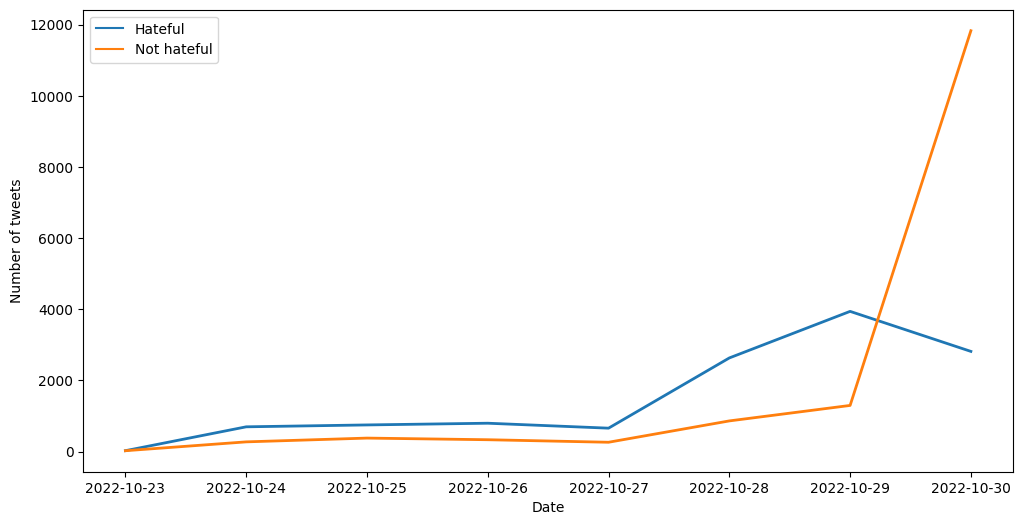

In [77]:
# Select only the rows that fall between 23/10/2022 and 01/11/2022
start_date = pd.to_datetime('2022-10-23').date()
end_date = pd.to_datetime('2022-10-30').date()
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df = df.loc[mask]

# Create a pivot table with Date as the index and separate columns for True and False
pivot_df = pd.pivot_table(df, values='Text', index='Date', columns='Is hateful', aggfunc='count')

# Create the line plot with separate lines for True and False
fig, ax = plt.subplots(figsize=(12, 6)) # Set figure size
ax.plot(pivot_df.index, pivot_df[True], label='Hateful')
ax.plot(pivot_df.index, pivot_df[False], label='Not hateful')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Number of tweets')

# Set the legend
ax.legend()

# Set the line width
plt.setp(ax.get_lines(), linewidth=2)

# Show the plot
plt.show()
